TS Ketapang

In [1]:
from new_ts import *
import time
import optuna
road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}

def objective(trial):
    tabu_tenure = trial.suggest_int("tabu_tenure", 5, 30)
    max_iter = trial.suggest_int("max_iter", 100, 500)
    neighborhood_size = trial.suggest_int("neighborhood_size", 1, 200)

    routing_ts = ClusterBasedDroneRoutingTS(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2}
    )

    routes = routing_ts.optimize_all_clusters(
        tabu_tenure=tabu_tenure,
        max_iter=max_iter,
        neighborhood_size=neighborhood_size
    )

    # Hitung total distance dari semua cluster (km)
    total_distance = 0
    for cid, cluster_routes in routes.items():
        for route, hotspot_indices in cluster_routes:
            locs = [routing_ts.road_points[cid]] + [routing_ts.coordinates[i] for i in hotspot_indices]
            dist_matrix = routing_ts.build_dist_matrix(locs)
            for i in range(len(route)-1):
                total_distance += dist_matrix[route[i]][route[i+1]]

    return total_distance

# --- Start timing here ---
start_time = time.time()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200, n_jobs=-1)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

print("Best params:", study.best_params)
print("Best total distance:", study.best_value)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

[I 2025-10-20 13:15:48,404] A new study created in memory with name: no-name-e92d22ff-ee0c-4983-96ec-0acfb71bb697
[I 2025-10-20 13:15:53,764] Trial 14 finished with value: 944.1857200154361 and parameters: {'tabu_tenure': 15, 'max_iter': 469, 'neighborhood_size': 184}. Best is trial 14 with value: 944.1857200154361.
[I 2025-10-20 13:16:00,041] Trial 19 finished with value: 949.910745812998 and parameters: {'tabu_tenure': 14, 'max_iter': 395, 'neighborhood_size': 63}. Best is trial 14 with value: 944.1857200154361.
[I 2025-10-20 13:16:00,416] Trial 16 finished with value: 968.9663316587755 and parameters: {'tabu_tenure': 9, 'max_iter': 228, 'neighborhood_size': 59}. Best is trial 14 with value: 944.1857200154361.
[I 2025-10-20 13:16:00,873] Trial 6 finished with value: 944.6271183161617 and parameters: {'tabu_tenure': 12, 'max_iter': 207, 'neighborhood_size': 75}. Best is trial 14 with value: 944.1857200154361.
[I 2025-10-20 13:16:00,980] Trial 5 finished with value: 949.186649396341 an

Best params: {'tabu_tenure': 15, 'max_iter': 469, 'neighborhood_size': 184}
Best total distance: 944.1857200154361
Total runtime: 182.84 seconds (3.05 minutes)


Running TS with params: {'tabu_tenure': 15, 'max_iter': 469, 'neighborhood_size': 184}

=== DRONE ROUTES (Tabu Search) ===
Cluster 0, Drone 1, Route: [0, 3, 4, 2, 25, 24, 26, 27, 28, 29, 30, 0]
Cluster 0, Drone 2, Route: [0, 1, 0]
Cluster 1, Drone 1, Route: [1, 15, 12, 59, 18, 20, 19, 60, 47, 62, 63, 61, 23, 22, 21, 53, 52, 48, 51, 50, 71, 72, 1]
Cluster 1, Drone 2, Route: [1, 49, 10, 9, 7, 55, 54, 6, 8, 56, 5, 11, 13, 14, 16, 17, 57, 58, 1]
Cluster 2, Drone 1, Route: [2, 31, 0, 36, 37, 38, 2]
Cluster 2, Drone 2, Route: [2, 66, 64, 65, 46, 67, 33, 34, 32, 42, 43, 41, 44, 39, 40, 35, 45, 68, 69, 70, 2]

Cluster 0 (Drones: 2)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H25 -> H24 -> H26 -> H27 -> H28 -> H29 -> H30 -> R0
    Total distance: 141.25 km | Est. time: 78.47 min
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km | Est. time: 60.66 min

Cluster 1 (Drones: 2)
  Drone 1 Route: R1 -> H15 -> H12 -> H59 -> H18 -> H20 -> H19 -> H60 -> H47 -> H62 -> H63 -> H61 -> H23 -> H22 -> 

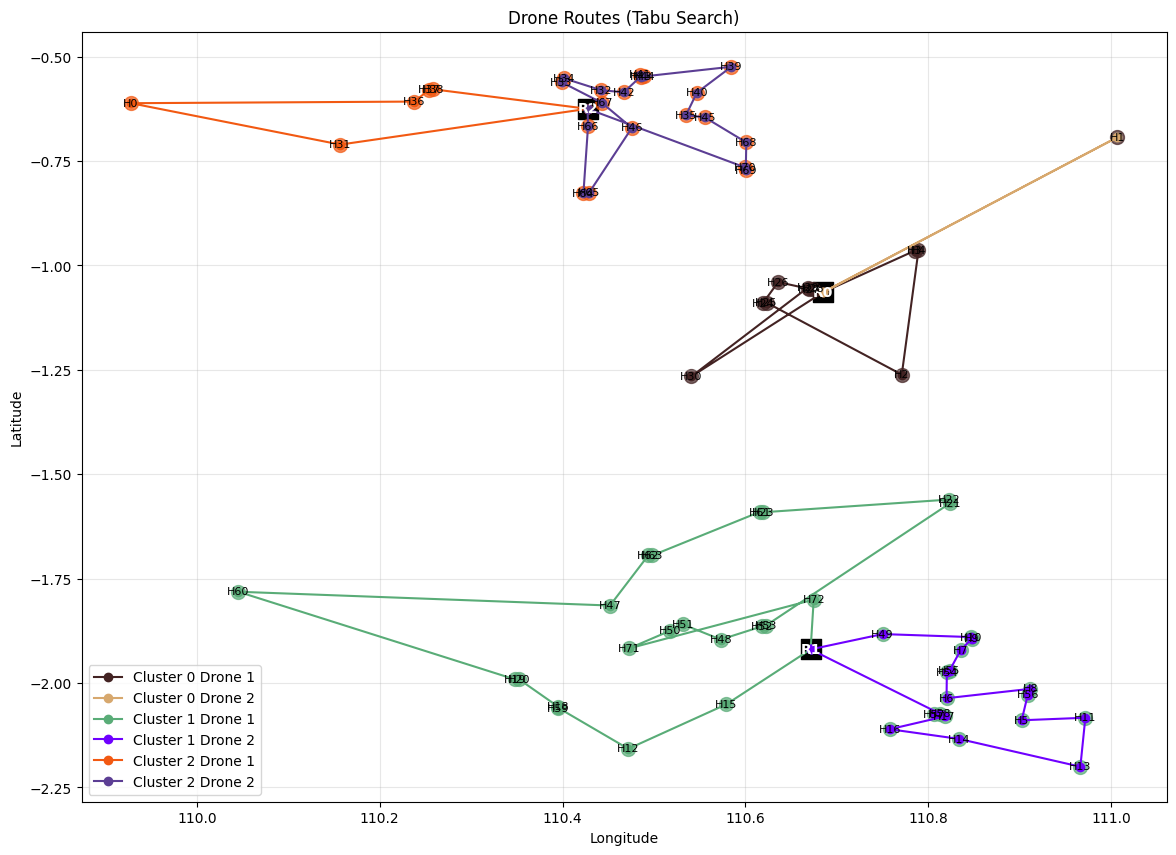

Total runtime: 1.24 seconds (0.02 minutes)


In [2]:
import time
from new_ts import ClusterBasedDroneRoutingTS

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)    
}

# buat routing problem
routing_ts_opt = ClusterBasedDroneRoutingTS(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

print("Running TS with params:", study.best_params)

# --- Start timing ---
start_time = time.time()

routes_opt = routing_ts_opt.optimize_all_clusters(
    tabu_tenure=study.best_params["tabu_tenure"],
    max_iter=study.best_params["max_iter"],
    neighborhood_size=study.best_params["neighborhood_size"]
)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

# tampilkan hasil
routing_ts_opt.print_cluster_routes(routes_opt)
routing_ts_opt.visualize_cluster_routes(routes_opt)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

TS Melawi

In [4]:
import time

def objective_melawi(trial):
    tabu_tenure = trial.suggest_int("tabu_tenure", 5, 30)
    max_iter = trial.suggest_int("max_iter", 100, 500)
    neighborhood_size = trial.suggest_int("neighborhood_size", 5, 200)

    road_points = {
        0: (-0.409011175, 112.1958254),
        1: (-0.592699463, 111.5859392),
        2: (-0.343085986, 111.7502586),
        3: (-0.569912205, 111.9740824)
    }

    n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

    routing_ts = ClusterBasedDroneRoutingTSMelawi(
        csv_file="hotspot_clustered.csv",
        road_points=road_points,
        n_drones=n_drones
    )

    routes = routing_ts.optimize_all_clusters(
        tabu_tenure=tabu_tenure,
        max_iter=max_iter,
        neighborhood_size=neighborhood_size
    )

    total_distance = 0
    for cid, cluster_routes in routes.items():
        for route, hotspot_indices in cluster_routes:
            locs = [routing_ts.road_points[cid]] + [routing_ts.coordinates[i] for i in hotspot_indices]
            dist_matrix = routing_ts.build_dist_matrix(locs)
            for i in range(len(route)-1):
                total_distance += dist_matrix[route[i]][route[i+1]]

    return total_distance

# --- Start timing here ---
start_time = time.time()

study_melawi = optuna.create_study(
    direction="minimize",
    study_name="melawi_tabu_search_optimization"
)

study_melawi.optimize(objective_melawi, n_trials=200, n_jobs=-1)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

print("Best params:", study_melawi.best_params)
print(f"Best total distance: {study_melawi.best_value:.2f} km")
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

[I 2025-10-20 13:24:14,720] A new study created in memory with name: melawi_tabu_search_optimization


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

[I 2025-10-20 13:24:21,445] Trial 9 finished with value: 511.17005455051685 and parameters: {'tabu_tenure': 25, 'max_iter': 268, 'neighborhood_size': 30}. Best is trial 9 with value: 511.17005455051685.
[I 2025-10-20 13:24:21,480] Trial 3 finished with value: 511.17005455051685 and parameters: {'tabu_tenure': 29, 'max_iter': 301, 'neighborhood_size': 36}. Best is trial 9 with value: 511.17005455051685.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:22,131] Trial 4 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 21, 'max_iter': 158, 'neighborhood_size': 71}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:22,331] Trial 16 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 28, 'max_iter': 129, 'neighborhood_size': 175}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:22,415] Trial 6 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 26, 'max_iter': 202, 'neighborhood_size': 147}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:22,609] Trial 12 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 27, 'max_iter': 290, 'neighborhood_size': 47}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:22,708] Trial 15 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 20, 'max_iter': 392, 'neighborhood_size': 17}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:23,077] Trial 1 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 9, 'max_iter': 228, 'neighborhood_size': 182}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:23,175] Trial 10 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 19, 'max_iter': 270, 'neighborhood_size': 179}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:23,192] Trial 18 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 23, 'max_iter': 219, 'neighborhood_size': 135}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:23,234] Trial 13 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 18, 'max_iter': 262, 'neighborhood_size': 112}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:23,948] Trial 11 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 11, 'max_iter': 291, 'neighborhood_size': 141}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:24,050] Trial 0 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 17, 'max_iter': 308, 'neighborhood_size': 74}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:24,613] Trial 8 finished with value: 511.1761846356677 and parameters: {'tabu_tenure': 6, 'max_iter': 268, 'neighborhood_size': 60}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:24,626] Trial 2 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 21, 'max_iter': 434, 'neighborhood_size': 125}. Best is trial 4 with value: 511.01457

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

[I 2025-10-20 13:24:33,028] Trial 21 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 10, 'max_iter': 152, 'neighborhood_size': 142}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:33,054] Trial 20 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 18, 'max_iter': 263, 'neighborhood_size': 122}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:35,190] Trial 22 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 6, 'max_iter': 484, 'neighborhood_size': 176}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:36,334] Trial 27 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 15, 'max_iter': 357, 'neighborhood_size': 105}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:36,542] Trial 23 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 13, 'max_iter': 434, 'neighborhood_size': 69}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:36,701] Trial 24 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 14, 'max_iter': 385, 'neighborhood_size': 73}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:37,006] Trial 33 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 371, 'neighborhood_size': 107}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:37,149] Trial 29 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 347, 'neighborhood_size': 113}. Best is trial 4 with value: 511.0

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:39,472] Trial 32 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 14, 'max_iter': 355, 'neighborhood_size': 109}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:39,518] Trial 35 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 15, 'max_iter': 350, 'neighborhood_size': 111}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:40,236] Trial 38 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 392, 'neighborhood_size': 112}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:40,613] Trial 36 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 368, 'neighborhood_size': 104}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:40,666] Trial 37 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 14, 'max_iter': 368, 'neighborhood_size': 109}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:40,810] Trial 26 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 482, 'neighborhood_size': 107}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:42,100] Trial 39 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 356, 'neighborhood_size': 109}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:44,027] Trial 42 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 351, 'neighborhood_size': 85}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:45,744] Trial 41 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 341, 'neighborhood_size': 91}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:46,321] Trial 40 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 15, 'max_iter': 346, 'neighborhood_size': 82}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:49,385] Trial 44 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 22, 'max_iter': 103, 'neighborhood_size': 88}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:49,727] Trial 43 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 22, 'max_iter': 348, 'neighborhood_size': 90}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:49,904] Trial 46 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 22, 'max_iter': 108, 'neighborhood_size': 89}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:50,048] Trial 47 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 23, 'max_iter': 108, 'neighborhood_size': 92}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:50,280] Trial 52 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 22, 'max_iter': 318, 'neighborhood_size': 52}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:51,118] Trial 45 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 21, 'max_iter': 331, 'neighborhood_size': 85}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:51,487] Trial 59 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 30, 'max_iter': 321, 'neighborhood_size': 196}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:52,253] Trial 48 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 22, 'max_iter': 324, 'neighborhood_size': 190}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:52,473] Trial 57 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 21, 'max_iter': 318, 'neighborhood_size': 53}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:52,936] Trial 51 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 22, 'max_iter': 412, 'neighborhood_size': 193}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:53,128] Trial 53 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 22, 'max_iter': 417, 'neighborhood_size': 198}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:53,878] Trial 49 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 21, 'max_iter': 415, 'neighborhood_size': 200}. Best is trial 4 with value: 511.0

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:54,878] Trial 58 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 30, 'max_iter': 316, 'neighborhood_size': 200}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:55,726] Trial 60 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 30, 'max_iter': 318, 'neighborhood_size': 51}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:56,809] Trial 62 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 30, 'max_iter': 323, 'neighborhood_size': 43}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:57,301] Trial 61 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 30, 'max_iter': 295, 'neighborhood_size': 45}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:57,951] Trial 63 finished with value: 511.01888411961966 and parameters: {'tabu_tenure': 30, 'max_iter': 304, 'neighborhood_size': 43}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:24:58,428] Trial 64 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 30, 'max_iter': 315, 'neighborhood_size': 49}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:24:59,650] Trial 66 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 29, 'max_iter': 314, 'neighborhood_size': 44}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:00,183] Trial 65 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 30, 'max_iter': 424, 'neighborhood_size': 44}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:00,900] Trial 67 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 30, 'max_iter': 423, 'neighborhood_size': 194}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:01,061] Trial 70 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 27, 'max_iter': 285, 'neighborhood_size': 37}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:01,205] Trial 71 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 27, 'max_iter': 246, 'neighborhood_size': 38}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:01,420] Trial 68 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 28, 'max_iter': 420, 'neighborhood_size': 46}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:01,431] Trial 69 finished with value: 511.4442888778612 and parameters: {'tabu_tenure': 27, 'max_iter': 241, 'neighborhood_size': 27}. Best is trial 4 with value: 511.0145

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:02,352] Trial 74 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 27, 'max_iter': 246, 'neighborhood_size': 31}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:02,463] Trial 75 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 27, 'max_iter': 287, 'neighborhood_size': 30}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:03,041] Trial 79 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 28, 'max_iter': 288, 'neighborhood_size': 127}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:03,467] Trial 83 finished with value: 512.2690931132003 and parameters: {'tabu_tenure': 28, 'max_iter': 243, 'neighborhood_size': 16}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:03,681] Trial 85 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 17, 'max_iter': 246, 'neighborhood_size': 15}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:03,733] Trial 84 finished with value: 512.7844524948579 and parameters: {'tabu_tenure': 27, 'max_iter': 247, 'neighborhood_size': 13}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:03,865] Trial 82 finished with value: 520.1681234977796 and parameters: {'tabu_tenure': 28, 'max_iter': 239, 'neighborhood_size': 8}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:04,010] Trial 81 finished with value: 511.17005455051685 and parameters: {'tabu_tenure': 27, 'max_iter': 246, 'neighborhood_size': 21}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:04,265] Trial 86 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 17, 'max_iter': 232, 'neighborhood_size': 27}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:06,227] Trial 88 finished with value: 512.9461488405544 and parameters: {'tabu_tenure': 17, 'max_iter': 460, 'neighborhood_size': 9}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:06,638] Trial 87 finished with value: 511.28880847969117 and parameters: {'tabu_tenure': 18, 'max_iter': 248, 'neighborhood_size': 14}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:07,585] Trial 89 finished with value: 516.0645116247582 and parameters: {'tabu_tenure': 17, 'max_iter': 161, 'neighborhood_size': 8}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:08,487] Trial 92 finished with value: 520.1732158378172 and parameters: {'tabu_tenure': 19, 'max_iter': 169, 'neighborhood_size': 7}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:09,012] Trial 90 finished with value: 511.74205085121656 and parameters: {'tabu_tenure': 19, 'max_iter': 148, 'neighborhood_size': 15}. Best is trial 4 with value: 511.014574

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:11,172] Trial 96 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 19, 'max_iter': 161, 'neighborhood_size': 168}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:11,387] Trial 99 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 19, 'max_iter': 177, 'neighborhood_size': 168}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:11,582] Trial 98 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 19, 'max_iter': 151, 'neighborhood_size': 170}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:11,894] Trial 100 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 25, 'max_iter': 453, 'neighborhood_size': 67}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:12,961] Trial 102 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 25, 'max_iter': 463, 'neighborhood_size': 72}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:13,243] Trial 103 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 19, 'max_iter': 444, 'neighborhood_size': 166}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:13,759] Trial 104 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 25, 'max_iter': 469, 'neighborhood_size': 168}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:14,157] Trial 105 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 19, 'max_iter': 459, 'neighborhood_size': 169}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:14,340] Trial 101 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 19, 'max_iter': 457, 'neighborhood_size': 170}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:15,240] Trial 106 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 25, 'max_iter': 455, 'neighborhood_size': 174}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:19,178] Trial 107 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 19, 'max_iter': 132, 'neighborhood_size': 167}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:19,416] Trial 108 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 25, 'max_iter': 148, 'neighborhood_size': 168}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:19,912] Trial 113 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 25, 'max_iter': 214, 'neighborhood_size': 66}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:20,048] Trial 114 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 25, 'max_iter': 213, 'neighborhood_size': 73}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:20,511] Trial 110 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 133, 'neighborhood_size': 67}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:21,540] Trial 109 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 25, 'max_iter': 457, 'neighborhood_size': 169}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:21,981] Trial 115 finished with value: 511.17005455051685 and parameters: {'tabu_tenure': 25, 'max_iter': 216, 'neighborhood_size': 64}. Best is trial 4 with value: 5

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:24,829] Trial 122 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 124, 'neighborhood_size': 100}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:25,382] Trial 123 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 217, 'neighborhood_size': 98}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:25,475] Trial 120 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 206, 'neighborhood_size': 120}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:25,509] Trial 121 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 214, 'neighborhood_size': 99}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:25,619] Trial 124 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 130, 'neighborhood_size': 97}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:26,060] Trial 125 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 203, 'neighborhood_size': 121}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:26,859] Trial 126 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 23, 'max_iter': 222, 'neighborhood_size': 99}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:27,541] Trial 127 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 407, 'neighborhood_size': 97}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:28,025] Trial 128 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 24, 'max_iter': 217, 'neighborhood_size': 96}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:33,765] Trial 129 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 23, 'max_iter': 399, 'neighborhood_size': 96}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:34,177] Trial 130 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 12, 'max_iter': 276, 'neighborhood_size': 99}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:34,264] Trial 131 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 20, 'max_iter': 276, 'neighborhood_size': 96}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:34,309] Trial 132 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 20, 'max_iter': 269, 'neighborhood_size': 119}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:35,039] Trial 138 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 9, 'max_iter': 275, 'neighborhood_size': 99}. Best is trial 4 with value: 51

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:37,098] Trial 141 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 12, 'max_iter': 390, 'neighborhood_size': 78}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:38,452] Trial 140 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 13, 'max_iter': 390, 'neighborhood_size': 124}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:38,458] Trial 143 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 20, 'max_iter': 383, 'neighborhood_size': 140}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:39,391] Trial 144 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 13, 'max_iter': 388, 'neighborhood_size': 186}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:39,860] Trial 142 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 13, 'max_iter': 394, 'neighborhood_size': 79}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:40,312] Trial 145 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 12, 'max_iter': 380, 'neighborhood_size': 78}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:42,592] Trial 146 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 13, 'max_iter': 387, 'neighborhood_size': 80}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:42,967] Trial 148 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 13, 'max_iter': 276, 'neighborhood_size': 78}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:43,237] Trial 147 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 13, 'max_iter': 380, 'neighborhood_size': 184}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:50,132] Trial 150 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 13, 'max_iter': 375, 'neighborhood_size': 78}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:50,531] Trial 152 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 12, 'max_iter': 443, 'neighborhood_size': 78}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:51,448] Trial 149 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 20, 'max_iter': 380, 'neighborhood_size': 183}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:51,486] Trial 151 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 13, 'max_iter': 376, 'neighborhood_size': 142}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:54,947] Trial 155 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 13, 'max_iter': 494, 'neighborhood_size': 78}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:55,525] Trial 156 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 13, 'max_iter': 436, 'neighborhood_size': 79}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:56,078] Trial 158 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 13, 'max_iter': 432, 'neighborhood_size': 78}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:56,145] Trial 154 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 13, 'max_iter': 378, 'neighborhood_size': 80}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:56,254] Trial 161 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 500, 'neighborhood_size': 80}. Best is trial 4 with value: 511

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:25:56,621] Trial 159 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 496, 'neighborhood_size': 79}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:58,414] Trial 157 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 378, 'neighborhood_size': 77}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:58,638] Trial 153 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 13, 'max_iter': 377, 'neighborhood_size': 148}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:59,186] Trial 162 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 499, 'neighborhood_size': 80}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:25:59,400] Trial 163 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 500, 'neighborhood_size': 85}. Best is trial 4 with value: 51

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:00,512] Trial 164 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 14, 'max_iter': 486, 'neighborhood_size': 136}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:02,362] Trial 166 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 491, 'neighborhood_size': 85}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:03,270] Trial 165 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 492, 'neighborhood_size': 86}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:03,847] Trial 167 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 497, 'neighborhood_size': 86}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:03,991] Trial 168 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 487, 'neighborhood_size': 87}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:09,527] Trial 170 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 18, 'max_iter': 493, 'neighborhood_size': 115}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:11,049] Trial 169 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 14, 'max_iter': 497, 'neighborhood_size': 135}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:11,531] Trial 172 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 338, 'neighborhood_size': 134}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:11,614] Trial 171 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 484, 'neighborhood_size': 105}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:13,987] Trial 173 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 476, 'neighborhood_size': 57}. Best is trial 4 with value:

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:15,215] Trial 174 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 16, 'max_iter': 481, 'neighborhood_size': 87}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:15,420] Trial 180 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 14, 'max_iter': 333, 'neighborhood_size': 105}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:15,769] Trial 178 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 29, 'max_iter': 473, 'neighborhood_size': 114}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:16,204] Trial 177 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 14, 'max_iter': 484, 'neighborhood_size': 113}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:16,948] Trial 183 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 14, 'max_iter': 363, 'neighborhood_size': 106}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:17,071] Trial 181 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 14, 'max_iter': 334, 'neighborhood_size': 105}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:17,219] Trial 179 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 18, 'max_iter': 475, 'neighborhood_size': 114}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:17,291] Trial 175 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 14, 'max_iter': 479, 'neighborhood_size': 106}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:17,586] Trial 176 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 14, 'max_iter': 483, 'neighborhood_size': 115}. Best is trial 4 with valu

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:20,464] Trial 184 finished with value: 511.75881676445704 and parameters: {'tabu_tenure': 14, 'max_iter': 360, 'neighborhood_size': 113}. Best is trial 4 with value: 511.0145741523468.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 13:26:23,496] Trial 192 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 29, 'max_iter': 367, 'neighborhood_size': 113}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:23,580] Trial 189 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 29, 'max_iter': 335, 'neighborhood_size': 105}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:24,588] Trial 191 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 29, 'max_iter': 365, 'neighborhood_size': 112}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:24,834] Trial 190 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 29, 'max_iter': 472, 'neighborhood_size': 114}. Best is trial 4 with value: 511.0145741523468.
[I 2025-10-20 13:26:25,446] Trial 193 finished with value: 511.0145741523468 and parameters: {'tabu_tenure': 29, 'max_iter': 308, 'neighborhood_size': 114}. Best is trial 4 with value:

Best params: {'tabu_tenure': 21, 'max_iter': 158, 'neighborhood_size': 71}
Best total distance: 511.01 km
Total runtime: 132.58 seconds (2.21 minutes)


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

 Running Tabu Search for Melawi with best Optuna params:
{'tabu_tenure': 21, 'max_iter': 158, 'neighborhood_size': 71}

=== DRONE ROUTES (Tabu Search, Fixed Version) ===

Cluster 1 (Drones: 2)
  Drone 1 Route: R1 -> H48 -> H9 -> H10 -> H6 -> H50 -> H51 -> R1
    Total distance: 76.11 km | Est. time: 42.28 min
  Drone 2 Route: R1 -> H7 -> H11 -> H8 -> H34 -> H52 -> R1
    Total distance: 49.62 km | Est. time: 27.56 min

Cluster 2 (Drones: 2)
  Drone 1 Route: R2 -> H39 -> H41 -> H40 -> H72 -> H69 -> H68 -> H22 -> H23 -> H70 -> H71 -> H24 -> H73 -> H74 -> H75 -> H76 -> R2
    Total distance: 62.89 km | Est. time: 34.94 min
  Drone 2 Route: R2 -> H65 -> H36 -> H64 -> H60 -> H62 -> H63 -> H61 -> H17 -> H18 -> H38 -> H20 -> H21 -> H19 -> H66 -> H67 -> R2
    Total distance: 96.18 km | Est. time: 53.43 min

Cluster 3 (Drones: 2)
  Drone 1 Route: R3 -> H1 -> H0 -> H2 -> H3 -> H4 -> R3
    Total distance: 48.45 km | E

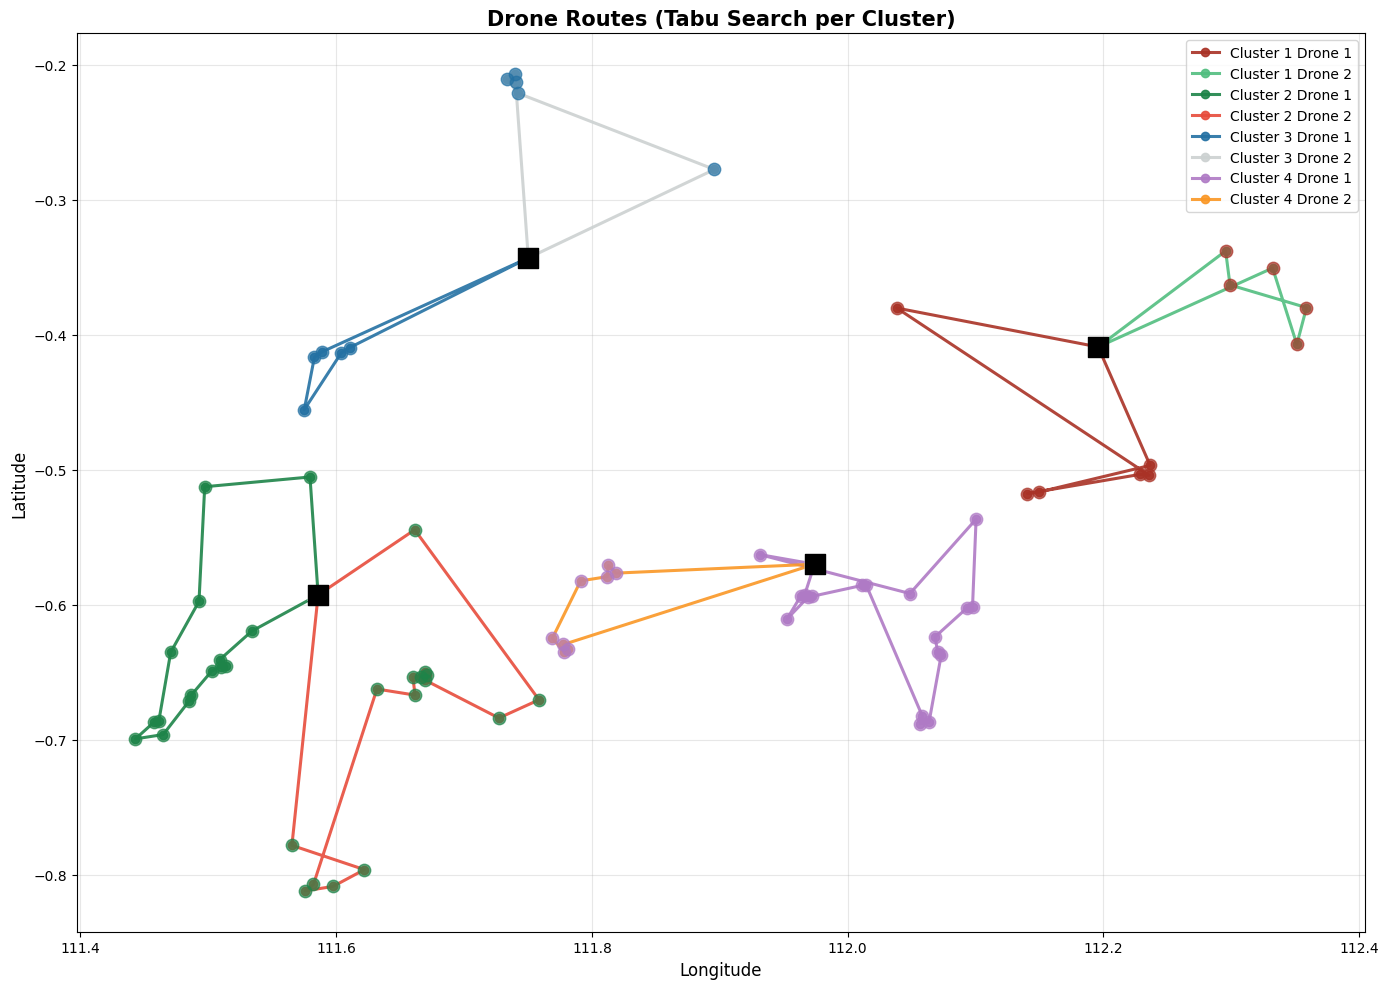

Total runtime: 0.39 seconds (0.01 minutes)


In [5]:
import time
best_params = study_melawi.best_params

road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}

n_drones = {0: 2, 1: 2, 2: 2, 3: 2}

routing_ts_opt_melawi = ClusterBasedDroneRoutingTSMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones=n_drones
)

print("\n Running Tabu Search for Melawi with best Optuna params:")
print(best_params)

# --- Start timing here ---
start_time = time.time()

# Jalankan Tabu Search dengan parameter terbaik
routes_opt_melawi = routing_ts_opt_melawi.optimize_all_clusters(
    tabu_tenure=best_params["tabu_tenure"],
    max_iter=best_params["max_iter"],
    neighborhood_size=best_params["neighborhood_size"]
)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

routing_ts_opt_melawi.print_cluster_routes(routes_opt_melawi)
routing_ts_opt_melawi.visualize_cluster_routes(routes_opt_melawi)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

GA TS Ketapang

In [1]:
import time
import optuna
import warnings
from new_ga_ts import *
warnings.filterwarnings("ignore")

road_points = {
    0: (-1.064124, 110.685258),
    1: (-1.919500, 110.671412),
    2: (-0.625036, 110.427354)
}

def objective(trial):
    pop = trial.suggest_int("population_size", 20, 40)
    gen = trial.suggest_int("generations", 80, 150)
    mut = trial.suggest_float("mutation_rate", 0.1, 0.25)
    tt = trial.suggest_int("tabu_tenure", 5, 15)
    tb = trial.suggest_int("tabu_budget", 50, 120)

    routing = ClusterBasedDroneRoutingHybridTabuOptimized(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2},
        tabu_tenure=tt,
        tabu_budget=tb
    )

    routes = routing.optimize_all_clusters(
        population_size=pop,
        generations=gen,
        mutation_rate=mut
    )

    total_distance = 0
    for cid, routes_list in routes.items():
        for route in routes_list:
            for i in range(len(route)-1):
                total_distance += routing.dist_matrix[route[i]][route[i+1]]

    print(f"Trial {trial.number}: pop={pop}, gen={gen}, mut={mut:.2f}, TT={tt}, TB={tb} → Dist={total_distance:.2f}")
    return total_distance

# --- Start timing here ---
start_time = time.time()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, n_jobs=-1)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

print("\n=== 🏆 Best Configuration ===")
print(f"Best params: {study.best_params}")
print(f"Best total distance: {study.best_value:.2f} km")
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

[I 2025-10-20 13:39:55,768] A new study created in memory with name: no-name-b540bd6f-6eb4-4aeb-a085-224b94d5fe38
[I 2025-10-20 13:47:23,232] Trial 4 finished with value: 870.1282560460085 and parameters: {'population_size': 21, 'generations': 108, 'mutation_rate': 0.15720301083052296, 'tabu_tenure': 14, 'tabu_budget': 81}. Best is trial 4 with value: 870.1282560460085.


Trial 4: pop=21, gen=108, mut=0.16, TT=14, TB=81 → Dist=870.13


[I 2025-10-20 13:47:52,971] Trial 17 finished with value: 865.9264620988283 and parameters: {'population_size': 24, 'generations': 94, 'mutation_rate': 0.12348886711497657, 'tabu_tenure': 12, 'tabu_budget': 86}. Best is trial 17 with value: 865.9264620988283.


Trial 17: pop=24, gen=94, mut=0.12, TT=12, TB=86 → Dist=865.93


[I 2025-10-20 13:48:37,232] Trial 14 finished with value: 866.4833909531624 and parameters: {'population_size': 20, 'generations': 98, 'mutation_rate': 0.19170046722998862, 'tabu_tenure': 14, 'tabu_budget': 107}. Best is trial 17 with value: 865.9264620988283.


Trial 14: pop=20, gen=98, mut=0.19, TT=14, TB=107 → Dist=866.48


[I 2025-10-20 13:49:04,430] Trial 3 finished with value: 859.5269518853261 and parameters: {'population_size': 21, 'generations': 143, 'mutation_rate': 0.12517174126360778, 'tabu_tenure': 11, 'tabu_budget': 92}. Best is trial 3 with value: 859.5269518853261.


Trial 3: pop=21, gen=143, mut=0.13, TT=11, TB=92 → Dist=859.53


[I 2025-10-20 13:49:10,543] Trial 9 finished with value: 865.310430637662 and parameters: {'population_size': 21, 'generations': 98, 'mutation_rate': 0.2437684254809982, 'tabu_tenure': 7, 'tabu_budget': 69}. Best is trial 3 with value: 859.5269518853261.


Trial 9: pop=21, gen=98, mut=0.24, TT=7, TB=69 → Dist=865.31


[I 2025-10-20 13:50:27,294] Trial 1 finished with value: 864.5897013981523 and parameters: {'population_size': 33, 'generations': 101, 'mutation_rate': 0.24014761137441515, 'tabu_tenure': 10, 'tabu_budget': 53}. Best is trial 3 with value: 859.5269518853261.


Trial 1: pop=33, gen=101, mut=0.24, TT=10, TB=53 → Dist=864.59


[I 2025-10-20 13:50:39,984] Trial 13 finished with value: 861.6906640078117 and parameters: {'population_size': 34, 'generations': 84, 'mutation_rate': 0.16336128034689618, 'tabu_tenure': 11, 'tabu_budget': 65}. Best is trial 3 with value: 859.5269518853261.


Trial 13: pop=34, gen=84, mut=0.16, TT=11, TB=65 → Dist=861.69


[I 2025-10-20 13:51:47,829] Trial 7 finished with value: 867.8714933963947 and parameters: {'population_size': 29, 'generations': 122, 'mutation_rate': 0.1412042987909584, 'tabu_tenure': 11, 'tabu_budget': 53}. Best is trial 3 with value: 859.5269518853261.


Trial 7: pop=29, gen=122, mut=0.14, TT=11, TB=53 → Dist=867.87


[I 2025-10-20 13:52:16,321] Trial 15 finished with value: 872.4451672063354 and parameters: {'population_size': 39, 'generations': 113, 'mutation_rate': 0.10329203551615526, 'tabu_tenure': 9, 'tabu_budget': 52}. Best is trial 3 with value: 859.5269518853261.


Trial 15: pop=39, gen=113, mut=0.10, TT=9, TB=52 → Dist=872.45


[I 2025-10-20 13:52:30,341] Trial 23 finished with value: 874.7990011531907 and parameters: {'population_size': 25, 'generations': 105, 'mutation_rate': 0.11327343038800211, 'tabu_tenure': 6, 'tabu_budget': 50}. Best is trial 3 with value: 859.5269518853261.


Trial 23: pop=25, gen=105, mut=0.11, TT=6, TB=50 → Dist=874.80


[I 2025-10-20 13:53:11,900] Trial 22 finished with value: 864.5897013981523 and parameters: {'population_size': 21, 'generations': 88, 'mutation_rate': 0.17494386904174075, 'tabu_tenure': 13, 'tabu_budget': 79}. Best is trial 3 with value: 859.5269518853261.


Trial 22: pop=21, gen=88, mut=0.17, TT=13, TB=79 → Dist=864.59
Trial 10: pop=22, gen=126, mut=0.19, TT=13, TB=86 → Dist=864.87


[I 2025-10-20 13:53:53,033] Trial 10 finished with value: 864.8714140794534 and parameters: {'population_size': 22, 'generations': 126, 'mutation_rate': 0.1890434027915386, 'tabu_tenure': 13, 'tabu_budget': 86}. Best is trial 3 with value: 859.5269518853261.
[I 2025-10-20 13:55:31,715] Trial 6 finished with value: 869.9900065850064 and parameters: {'population_size': 38, 'generations': 81, 'mutation_rate': 0.11240845048132893, 'tabu_tenure': 9, 'tabu_budget': 86}. Best is trial 3 with value: 859.5269518853261.


Trial 6: pop=38, gen=81, mut=0.11, TT=9, TB=86 → Dist=869.99
Trial 5: pop=40, gen=122, mut=0.16, TT=11, TB=88 → Dist=858.42


[I 2025-10-20 13:56:11,035] Trial 5 finished with value: 858.4162620860727 and parameters: {'population_size': 40, 'generations': 122, 'mutation_rate': 0.16085408171884302, 'tabu_tenure': 11, 'tabu_budget': 88}. Best is trial 5 with value: 858.4162620860727.
[I 2025-10-20 13:56:16,618] Trial 21 finished with value: 863.7332642568925 and parameters: {'population_size': 22, 'generations': 146, 'mutation_rate': 0.24433767362687403, 'tabu_tenure': 8, 'tabu_budget': 84}. Best is trial 5 with value: 858.4162620860727.


Trial 21: pop=22, gen=146, mut=0.24, TT=8, TB=84 → Dist=863.73


[I 2025-10-20 13:56:19,992] Trial 19 finished with value: 859.7948559765432 and parameters: {'population_size': 36, 'generations': 103, 'mutation_rate': 0.20558034834314087, 'tabu_tenure': 10, 'tabu_budget': 74}. Best is trial 5 with value: 858.4162620860727.


Trial 19: pop=36, gen=103, mut=0.21, TT=10, TB=74 → Dist=859.79


[I 2025-10-20 13:57:08,784] Trial 20 finished with value: 865.3425046833873 and parameters: {'population_size': 38, 'generations': 101, 'mutation_rate': 0.16939232555344313, 'tabu_tenure': 8, 'tabu_budget': 82}. Best is trial 5 with value: 858.4162620860727.


Trial 20: pop=38, gen=101, mut=0.17, TT=8, TB=82 → Dist=865.34


[I 2025-10-20 13:57:31,696] Trial 18 finished with value: 858.4162620860726 and parameters: {'population_size': 31, 'generations': 111, 'mutation_rate': 0.2305093272061098, 'tabu_tenure': 14, 'tabu_budget': 89}. Best is trial 18 with value: 858.4162620860726.


Trial 18: pop=31, gen=111, mut=0.23, TT=14, TB=89 → Dist=858.42


[I 2025-10-20 13:57:42,910] Trial 0 finished with value: 860.1187925586214 and parameters: {'population_size': 38, 'generations': 83, 'mutation_rate': 0.15398975194079803, 'tabu_tenure': 14, 'tabu_budget': 115}. Best is trial 18 with value: 858.4162620860726.


Trial 0: pop=38, gen=83, mut=0.15, TT=14, TB=115 → Dist=860.12


[I 2025-10-20 13:59:50,345] Trial 11 finished with value: 870.0314930969228 and parameters: {'population_size': 40, 'generations': 97, 'mutation_rate': 0.10939916721889364, 'tabu_tenure': 9, 'tabu_budget': 93}. Best is trial 18 with value: 858.4162620860726.


Trial 11: pop=40, gen=97, mut=0.11, TT=9, TB=93 → Dist=870.03


[I 2025-10-20 14:02:26,206] Trial 12 finished with value: 864.7576056663263 and parameters: {'population_size': 35, 'generations': 115, 'mutation_rate': 0.16923212383839897, 'tabu_tenure': 14, 'tabu_budget': 109}. Best is trial 18 with value: 858.4162620860726.


Trial 12: pop=35, gen=115, mut=0.17, TT=14, TB=109 → Dist=864.76
Trial 8: pop=36, gen=119, mut=0.21, TT=6, TB=89 → Dist=866.70

[I 2025-10-20 14:02:44,843] Trial 8 finished with value: 866.7014013315238 and parameters: {'population_size': 36, 'generations': 119, 'mutation_rate': 0.21147323326045586, 'tabu_tenure': 6, 'tabu_budget': 89}. Best is trial 18 with value: 858.4162620860726.



Trial 24: pop=33, gen=86, mut=0.25, TT=12, TB=89 → Dist=859.36

[I 2025-10-20 14:03:32,108] Trial 24 finished with value: 859.360588859819 and parameters: {'population_size': 33, 'generations': 86, 'mutation_rate': 0.24878452366537115, 'tabu_tenure': 12, 'tabu_budget': 89}. Best is trial 18 with value: 858.4162620860726.


[I 2025-10-20 14:04:30,119] Trial 16 finished with value: 860.1293479922883 and parameters: {'population_size': 34, 'generations': 123, 'mutation_rate': 0.2215393051167578, 'tabu_tenure': 6, 'tabu_budget': 117}. Best is trial 18 with value: 858.4162620860726.


Trial 16: pop=34, gen=123, mut=0.22, TT=6, TB=117 → Dist=860.13


[I 2025-10-20 14:05:06,397] Trial 29 finished with value: 858.9624159513959 and parameters: {'population_size': 28, 'generations': 147, 'mutation_rate': 0.19710232205020234, 'tabu_tenure': 8, 'tabu_budget': 119}. Best is trial 18 with value: 858.4162620860726.


Trial 29: pop=28, gen=147, mut=0.20, TT=8, TB=119 → Dist=858.96


[I 2025-10-20 14:06:07,410] Trial 25 finished with value: 859.8404114717999 and parameters: {'population_size': 34, 'generations': 132, 'mutation_rate': 0.1983490221404593, 'tabu_tenure': 7, 'tabu_budget': 67}. Best is trial 18 with value: 858.4162620860726.


Trial 25: pop=34, gen=132, mut=0.20, TT=7, TB=67 → Dist=859.84


[I 2025-10-20 14:08:19,666] Trial 34 finished with value: 858.9690870574082 and parameters: {'population_size': 28, 'generations': 142, 'mutation_rate': 0.13487975804303043, 'tabu_tenure': 15, 'tabu_budget': 101}. Best is trial 18 with value: 858.4162620860726.


Trial 34: pop=28, gen=142, mut=0.13, TT=15, TB=101 → Dist=858.97


[I 2025-10-20 14:08:51,099] Trial 2 finished with value: 859.4713101054475 and parameters: {'population_size': 38, 'generations': 125, 'mutation_rate': 0.19131717829619344, 'tabu_tenure': 6, 'tabu_budget': 120}. Best is trial 18 with value: 858.4162620860726.


Trial 2: pop=38, gen=125, mut=0.19, TT=6, TB=120 → Dist=859.47
Trial 30: pop=34, gen=146, mut=0.20, TT=9, TB=101 → Dist=864.59


[I 2025-10-20 14:08:59,174] Trial 30 finished with value: 864.5897013981523 and parameters: {'population_size': 34, 'generations': 146, 'mutation_rate': 0.20009297159458433, 'tabu_tenure': 9, 'tabu_budget': 101}. Best is trial 18 with value: 858.4162620860726.
[I 2025-10-20 14:09:23,837] Trial 36 finished with value: 858.4162620860727 and parameters: {'population_size': 29, 'generations': 143, 'mutation_rate': 0.1392655992814381, 'tabu_tenure': 15, 'tabu_budget': 99}. Best is trial 18 with value: 858.4162620860726.


Trial 36: pop=29, gen=143, mut=0.14, TT=15, TB=99 → Dist=858.42


[I 2025-10-20 14:11:01,914] Trial 28 finished with value: 864.5897013981523 and parameters: {'population_size': 22, 'generations': 142, 'mutation_rate': 0.20168477544456856, 'tabu_tenure': 5, 'tabu_budget': 117}. Best is trial 18 with value: 858.4162620860726.


Trial 28: pop=22, gen=142, mut=0.20, TT=5, TB=117 → Dist=864.59


[I 2025-10-20 14:11:21,509] Trial 33 finished with value: 859.4713101054475 and parameters: {'population_size': 28, 'generations': 146, 'mutation_rate': 0.13402307460348284, 'tabu_tenure': 9, 'tabu_budget': 101}. Best is trial 18 with value: 858.4162620860726.


Trial 33: pop=28, gen=146, mut=0.13, TT=9, TB=101 → Dist=859.47


[I 2025-10-20 14:13:26,030] Trial 44 finished with value: 858.819011430826 and parameters: {'population_size': 29, 'generations': 135, 'mutation_rate': 0.2295511179375216, 'tabu_tenure': 15, 'tabu_budget': 100}. Best is trial 18 with value: 858.4162620860726.


Trial 44: pop=29, gen=135, mut=0.23, TT=15, TB=100 → Dist=858.82


[I 2025-10-20 14:14:30,738] Trial 27 finished with value: 866.1153510497637 and parameters: {'population_size': 30, 'generations': 148, 'mutation_rate': 0.14056529122648243, 'tabu_tenure': 6, 'tabu_budget': 90}. Best is trial 18 with value: 858.4162620860726.


Trial 27: pop=30, gen=148, mut=0.14, TT=6, TB=90 → Dist=866.12


[I 2025-10-20 14:16:17,003] Trial 26 finished with value: 864.7576056663263 and parameters: {'population_size': 30, 'generations': 144, 'mutation_rate': 0.12654036384422318, 'tabu_tenure': 15, 'tabu_budget': 120}. Best is trial 18 with value: 858.4162620860726.


Trial 26: pop=30, gen=144, mut=0.13, TT=15, TB=120 → Dist=864.76


[I 2025-10-20 14:17:13,401] Trial 38 finished with value: 865.0537520325273 and parameters: {'population_size': 29, 'generations': 133, 'mutation_rate': 0.2226483079343145, 'tabu_tenure': 5, 'tabu_budget': 99}. Best is trial 18 with value: 858.4162620860726.


Trial 38: pop=29, gen=133, mut=0.22, TT=5, TB=99 → Dist=865.05
Trial 46: pop=31, gen=132, mut=0.23, TT=5, TB=98 → Dist=866.39


[I 2025-10-20 14:18:25,993] Trial 46 finished with value: 866.3920677370375 and parameters: {'population_size': 31, 'generations': 132, 'mutation_rate': 0.2261886402881612, 'tabu_tenure': 5, 'tabu_budget': 98}. Best is trial 18 with value: 858.4162620860726.
[I 2025-10-20 14:18:35,047] Trial 35 finished with value: 859.6935273886928 and parameters: {'population_size': 30, 'generations': 143, 'mutation_rate': 0.13300466725997542, 'tabu_tenure': 15, 'tabu_budget': 100}. Best is trial 18 with value: 858.4162620860726.


Trial 35: pop=30, gen=143, mut=0.13, TT=15, TB=100 → Dist=859.69


[I 2025-10-20 14:18:42,685] Trial 37 finished with value: 859.4713101054476 and parameters: {'population_size': 30, 'generations': 133, 'mutation_rate': 0.21993583273721273, 'tabu_tenure': 15, 'tabu_budget': 103}. Best is trial 18 with value: 858.4162620860726.


Trial 37: pop=30, gen=133, mut=0.22, TT=15, TB=103 → Dist=859.47


[I 2025-10-20 14:18:45,523] Trial 48 finished with value: 859.8318719166673 and parameters: {'population_size': 31, 'generations': 135, 'mutation_rate': 0.2275962683563001, 'tabu_tenure': 15, 'tabu_budget': 100}. Best is trial 18 with value: 858.4162620860726.


Trial 48: pop=31, gen=135, mut=0.23, TT=15, TB=100 → Dist=859.83


[I 2025-10-20 14:18:56,419] Trial 49 finished with value: 859.7948559765431 and parameters: {'population_size': 31, 'generations': 134, 'mutation_rate': 0.14604077956194134, 'tabu_tenure': 15, 'tabu_budget': 99}. Best is trial 18 with value: 858.4162620860726.


Trial 49: pop=31, gen=134, mut=0.15, TT=15, TB=99 → Dist=859.79


[I 2025-10-20 14:19:19,247] Trial 32 finished with value: 866.4998365549054 and parameters: {'population_size': 32, 'generations': 146, 'mutation_rate': 0.14201725518928177, 'tabu_tenure': 8, 'tabu_budget': 102}. Best is trial 18 with value: 858.4162620860726.


Trial 32: pop=32, gen=146, mut=0.14, TT=8, TB=102 → Dist=866.50


[I 2025-10-20 14:19:43,449] Trial 39 finished with value: 865.2411337823721 and parameters: {'population_size': 30, 'generations': 135, 'mutation_rate': 0.2093036745159743, 'tabu_tenure': 15, 'tabu_budget': 106}. Best is trial 18 with value: 858.4162620860726.


Trial 39: pop=30, gen=135, mut=0.21, TT=15, TB=106 → Dist=865.24
Trial 40: pop=30, gen=139, mut=0.14, TT=15, TB=98 → Dist=865.04


[I 2025-10-20 14:19:49,016] Trial 40 finished with value: 865.036365814488 and parameters: {'population_size': 30, 'generations': 139, 'mutation_rate': 0.13872755653349145, 'tabu_tenure': 15, 'tabu_budget': 98}. Best is trial 18 with value: 858.4162620860726.
[I 2025-10-20 14:19:51,971] Trial 31 finished with value: 864.9734033170349 and parameters: {'population_size': 35, 'generations': 150, 'mutation_rate': 0.13925596665813364, 'tabu_tenure': 9, 'tabu_budget': 104}. Best is trial 18 with value: 858.4162620860726.


Trial 31: pop=35, gen=150, mut=0.14, TT=9, TB=104 → Dist=864.97


[I 2025-10-20 14:19:54,682] Trial 41 finished with value: 860.5161107365112 and parameters: {'population_size': 30, 'generations': 134, 'mutation_rate': 0.14364987267070897, 'tabu_tenure': 15, 'tabu_budget': 97}. Best is trial 18 with value: 858.4162620860726.


Trial 41: pop=30, gen=134, mut=0.14, TT=15, TB=97 → Dist=860.52


[I 2025-10-20 14:20:07,923] Trial 43 finished with value: 865.9232833676989 and parameters: {'population_size': 31, 'generations': 131, 'mutation_rate': 0.2286831549356963, 'tabu_tenure': 15, 'tabu_budget': 99}. Best is trial 18 with value: 858.4162620860726.


Trial 43: pop=31, gen=131, mut=0.23, TT=15, TB=99 → Dist=865.92


[I 2025-10-20 14:20:11,395] Trial 45 finished with value: 859.4713101054475 and parameters: {'population_size': 29, 'generations': 135, 'mutation_rate': 0.2158717471643826, 'tabu_tenure': 15, 'tabu_budget': 103}. Best is trial 18 with value: 858.4162620860726.


Trial 45: pop=29, gen=135, mut=0.22, TT=15, TB=103 → Dist=859.47


[I 2025-10-20 14:20:11,986] Trial 42 finished with value: 864.7576056663263 and parameters: {'population_size': 30, 'generations': 134, 'mutation_rate': 0.22605363498347428, 'tabu_tenure': 15, 'tabu_budget': 99}. Best is trial 18 with value: 858.4162620860726.


Trial 42: pop=30, gen=134, mut=0.23, TT=15, TB=99 → Dist=864.76


[I 2025-10-20 14:20:24,642] Trial 47 finished with value: 863.2941850850116 and parameters: {'population_size': 31, 'generations': 136, 'mutation_rate': 0.228575997897432, 'tabu_tenure': 5, 'tabu_budget': 98}. Best is trial 18 with value: 858.4162620860726.


Trial 47: pop=31, gen=136, mut=0.23, TT=5, TB=98 → Dist=863.29

=== 🏆 Best Configuration ===
Best params: {'population_size': 31, 'generations': 111, 'mutation_rate': 0.2305093272061098, 'tabu_tenure': 14, 'tabu_budget': 89}
Best total distance: 858.42 km
Total runtime: 2428.88 seconds (40.48 minutes)


In [3]:
import time
import optuna
import warnings
from new_ga_ts import *
warnings.filterwarnings("ignore")

road_points = {
    0: (-1.064124, 110.685258),
    1: (-1.919500, 110.671412),
    2: (-0.625036, 110.427354)
}
routing_hybrid = ClusterBasedDroneRoutingHybridTabuOptimized(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2},
    tabu_tenure=14,
    tabu_budget=89
)
# --- Start timing here ---
start_time = time.time()

routes = routing_hybrid.optimize_all_clusters(
    population_size=31,
    generations=111,
    mutation_rate=0.2305093272061098
)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

routing_hybrid.print_cluster_routes(routes)
routing_hybrid.visualize_cluster_routes(routes)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")


=== DRONE ROUTES (Optimized Hybrid GA + Tabu Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
    Total distance: 108.70 km | Time: 60.39 min 
  Drone 2 Route: [0, 4, 0]
    Total distance: 109.19 km | Time: 60.66 min 

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: [1, 51, 55, 56, 75, 24, 25, 26, 64, 66, 65, 50, 54, 53, 74, 63, 22, 23, 21, 62, 15, 18, 1]
    Total distance: 281.99 km | Time: 156.66 min 
  Drone 2 Route: [1, 52, 13, 12, 10, 58, 57, 11, 59, 8, 14, 16, 17, 19, 60, 61, 20, 9, 1]
    Total distance: 130.28 km | Time: 72.38 min 

Cluster 2 (Drones: 2):
  Start from road point: (-0.62504, 110.42735)
  Drone 1 Route: [2, 34, 3, 39, 40, 41, 2]
    Total distance: 117.41 km | Time: 65.23 min 
  Drone 2 Route: [2, 69, 49, 67, 68, 72, 73, 71, 48, 38, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2]
    Total distance: 117.02 km | Time: 65.01 min 
✅ Var

GA TS Melawi

In [4]:
import optuna
import time
import warnings
warnings.filterwarnings("ignore")

road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}

def objective_melawi(trial):
    pop = trial.suggest_int("population_size", 20, 40)
    gen = trial.suggest_int("generations", 80, 150)
    mut = trial.suggest_float("mutation_rate", 0.1, 0.25)
    tt = trial.suggest_int("tabu_tenure", 5, 20)
    tb = trial.suggest_int("tabu_budget", 50, 120)

    routing = ClusterBasedDroneRoutingHybridTabuMelawi(
        csv_file="hotspot_clustered.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2, 3: 2},
        tabu_tenure=tt,
        tabu_budget=tb
    )

    routes = routing.optimize_all_clusters(
        population_size=pop,
        generations=gen,
        mutation_rate=mut
    )

    total_distance = 0
    for cid, routes_list in routes.items():
        for route in routes_list:
            for i in range(len(route)-1):
                total_distance += routing.dist_matrix[route[i]][route[i+1]]

    print(f"Trial {trial.number}: pop={pop}, gen={gen}, mut={mut:.2f}, TT={tt}, TB={tb} → Dist={total_distance:.2f}")
    return total_distance


# --- Start timing here ---
start_time = time.time()

study_melawi = optuna.create_study(direction="minimize", study_name="melawi_hybrid_ga_tabu")
study_melawi.optimize(objective_melawi, n_trials=50, n_jobs=-1)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

print("\n=== 🏆 Best Configuration (Melawi Hybrid GA + Tabu) ===")
print(f"Best params: {study_melawi.best_params}")
print(f"Best total distance: {study_melawi.best_value:.2f} km")
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")

[I 2025-10-20 14:28:07,813] A new study created in memory with name: melawi_hybrid_ga_tabu


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

[I 2025-10-20 14:34:09,317] Trial 13 finished with value: 475.0532747517317 and parameters: {'population_size': 21, 'generations': 136, 'mutation_rate': 0.14175329833643022, 'tabu_tenure': 18, 'tabu_budget': 77}. Best is trial 13 with value: 475.0532747517317.


Trial 13: pop=21, gen=136, mut=0.14, TT=18, TB=77 → Dist=475.05
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:37:03,289] Trial 12 finished with value: 474.4026481059254 and parameters: {'population_size': 20, 'generations': 129, 'mutation_rate': 0.1854426108839352, 'tabu_tenure': 14, 'tabu_budget': 87}. Best is trial 12 with value: 474.4026481059254.


Trial 12: pop=20, gen=129, mut=0.19, TT=14, TB=87 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:38:47,092] Trial 19 finished with value: 476.31976324664913 and parameters: {'population_size': 25, 'generations': 83, 'mutation_rate': 0.10196009392899019, 'tabu_tenure': 12, 'tabu_budget': 73}. Best is trial 12 with value: 474.4026481059254.


Trial 19: pop=25, gen=83, mut=0.10, TT=12, TB=73 → Dist=476.32
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:39:07,213] Trial 9 finished with value: 476.4060390757046 and parameters: {'population_size': 20, 'generations': 83, 'mutation_rate': 0.1471040028585105, 'tabu_tenure': 8, 'tabu_budget': 97}. Best is trial 12 with value: 474.4026481059254.


Trial 9: pop=20, gen=83, mut=0.15, TT=8, TB=97 → Dist=476.41
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:40:39,953] Trial 5 finished with value: 474.4026481059254 and parameters: {'population_size': 35, 'generations': 141, 'mutation_rate': 0.14136733285124267, 'tabu_tenure': 18, 'tabu_budget': 75}. Best is trial 12 with value: 474.4026481059254.


Trial 5: pop=35, gen=141, mut=0.14, TT=18, TB=75 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:42:21,897] Trial 6 finished with value: 474.5831770273415 and parameters: {'population_size': 35, 'generations': 111, 'mutation_rate': 0.10010050788605553, 'tabu_tenure': 13, 'tabu_budget': 78}. Best is trial 12 with value: 474.4026481059254.


Trial 6: pop=35, gen=111, mut=0.10, TT=13, TB=78 → Dist=474.58
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
Trial 18: pop=38, gen=129, mut=0.11, TT=19, TB=79 → Dist=474.74


[I 2025-10-20 14:44:22,028] Trial 18 finished with value: 474.7414209709154 and parameters: {'population_size': 38, 'generations': 129, 'mutation_rate': 0.1050694831594012, 'tabu_tenure': 19, 'tabu_budget': 79}. Best is trial 12 with value: 474.4026481059254.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:44:39,245] Trial 7 finished with value: 474.56716701353014 and parameters: {'population_size': 35, 'generations': 84, 'mutation_rate': 0.15030964054440832, 'tabu_tenure': 8, 'tabu_budget': 86}. Best is trial 12 with value: 474.4026481059254.


Trial 7: pop=35, gen=84, mut=0.15, TT=8, TB=86 → Dist=474.57
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:45:07,589] Trial 15 finished with value: 476.24152016809984 and parameters: {'population_size': 24, 'generations': 91, 'mutation_rate': 0.20140933670648964, 'tabu_tenure': 13, 'tabu_budget': 110}. Best is trial 12 with value: 474.4026481059254.


Trial 15: pop=24, gen=91, mut=0.20, TT=13, TB=110 → Dist=476.24
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:45:43,480] Trial 4 finished with value: 474.6614201058908 and parameters: {'population_size': 36, 'generations': 105, 'mutation_rate': 0.1739841376980637, 'tabu_tenure': 17, 'tabu_budget': 111}. Best is trial 12 with value: 474.4026481059254.


Trial 4: pop=36, gen=105, mut=0.17, TT=17, TB=111 → Dist=474.66
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:46:49,891] Trial 0 finished with value: 474.74774448312684 and parameters: {'population_size': 38, 'generations': 101, 'mutation_rate': 0.12899939187426568, 'tabu_tenure': 15, 'tabu_budget': 73}. Best is trial 12 with value: 474.4026481059254.


Trial 0: pop=38, gen=101, mut=0.13, TT=15, TB=73 → Dist=474.75
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:47:09,444] Trial 11 finished with value: 474.5831770273415 and parameters: {'population_size': 28, 'generations': 94, 'mutation_rate': 0.13934612530524382, 'tabu_tenure': 8, 'tabu_budget': 110}. Best is trial 12 with value: 474.4026481059254.


Trial 11: pop=28, gen=94, mut=0.14, TT=8, TB=110 → Dist=474.58


[I 2025-10-20 14:47:22,539] Trial 8 finished with value: 474.4708474132659 and parameters: {'population_size': 27, 'generations': 119, 'mutation_rate': 0.19941375027444674, 'tabu_tenure': 12, 'tabu_budget': 96}. Best is trial 12 with value: 474.4026481059254.


Trial 8: pop=27, gen=119, mut=0.20, TT=12, TB=96 → Dist=474.47
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:48:53,652] Trial 17 finished with value: 474.4026481059254 and parameters: {'population_size': 29, 'generations': 127, 'mutation_rate': 0.2343688396979203, 'tabu_tenure': 17, 'tabu_budget': 94}. Best is trial 12 with value: 474.4026481059254.


Trial 17: pop=29, gen=127, mut=0.23, TT=17, TB=94 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:50:41,202] Trial 10 finished with value: 474.470847413266 and parameters: {'population_size': 39, 'generations': 101, 'mutation_rate': 0.11285759429666663, 'tabu_tenure': 15, 'tabu_budget': 86}. Best is trial 12 with value: 474.4026481059254.


Trial 10: pop=39, gen=101, mut=0.11, TT=15, TB=86 → Dist=474.47
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:51:19,948] Trial 14 finished with value: 474.4808911844747 and parameters: {'population_size': 40, 'generations': 120, 'mutation_rate': 0.14294843350555442, 'tabu_tenure': 16, 'tabu_budget': 104}. Best is trial 12 with value: 474.4026481059254.


Trial 14: pop=40, gen=120, mut=0.14, TT=16, TB=104 → Dist=474.48
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:52:31,611] Trial 1 finished with value: 475.54433846708855 and parameters: {'population_size': 37, 'generations': 133, 'mutation_rate': 0.1740567582537743, 'tabu_tenure': 6, 'tabu_budget': 70}. Best is trial 12 with value: 474.4026481059254.


Trial 1: pop=37, gen=133, mut=0.17, TT=6, TB=70 → Dist=475.54
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:53:27,777] Trial 20 finished with value: 474.4026481059254 and parameters: {'population_size': 29, 'generations': 105, 'mutation_rate': 0.1526303878466825, 'tabu_tenure': 5, 'tabu_budget': 105}. Best is trial 12 with value: 474.4026481059254.


Trial 20: pop=29, gen=105, mut=0.15, TT=5, TB=105 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:54:49,772] Trial 21 finished with value: 474.56716701353014 and parameters: {'population_size': 34, 'generations': 80, 'mutation_rate': 0.14319065536026993, 'tabu_tenure': 18, 'tabu_budget': 112}. Best is trial 12 with value: 474.4026481059254.


Trial 21: pop=34, gen=80, mut=0.14, TT=18, TB=112 → Dist=474.57
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:56:03,770] Trial 24 finished with value: 474.8208231480528 and parameters: {'population_size': 25, 'generations': 146, 'mutation_rate': 0.11476471822524571, 'tabu_tenure': 15, 'tabu_budget': 63}. Best is trial 12 with value: 474.4026481059254.


Trial 24: pop=25, gen=146, mut=0.11, TT=15, TB=63 → Dist=474.82
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 14:57:04,938] Trial 22 finished with value: 475.2251151058342 and parameters: {'population_size': 29, 'generations': 131, 'mutation_rate': 0.17448969040838297, 'tabu_tenure': 11, 'tabu_budget': 62}. Best is trial 12 with value: 474.4026481059254.


Trial 22: pop=29, gen=131, mut=0.17, TT=11, TB=62 → Dist=475.23
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
Trial 3: pop=36, gen=116, mut=0.15, TT=9, TB=117 → Dist=474.51


[I 2025-10-20 14:59:27,805] Trial 3 finished with value: 474.5081375801622 and parameters: {'population_size': 36, 'generations': 116, 'mutation_rate': 0.14859637237146947, 'tabu_tenure': 9, 'tabu_budget': 117}. Best is trial 12 with value: 474.4026481059254.
[I 2025-10-20 14:59:30,645] Trial 16 finished with value: 474.4808911844747 and parameters: {'population_size': 31, 'generations': 136, 'mutation_rate': 0.24006537667735448, 'tabu_tenure': 7, 'tabu_budget': 115}. Best is trial 12 with value: 474.4026481059254.


Trial 16: pop=31, gen=136, mut=0.24, TT=7, TB=115 → Dist=474.48
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 15:00:22,582] Trial 27 finished with value: 474.94278726127624 and parameters: {'population_size': 25, 'generations': 124, 'mutation_rate': 0.12497384988911603, 'tabu_tenure': 10, 'tabu_budget': 66}. Best is trial 12 with value: 474.4026481059254.


Trial 27: pop=25, gen=124, mut=0.12, TT=10, TB=66 → Dist=474.94
Trial 25: pop=22, gen=100, mut=0.15, TT=7, TB=116 → Dist=474.40


[I 2025-10-20 15:00:33,782] Trial 25 finished with value: 474.4026481059254 and parameters: {'population_size': 22, 'generations': 100, 'mutation_rate': 0.1470021993091833, 'tabu_tenure': 7, 'tabu_budget': 116}. Best is trial 12 with value: 474.4026481059254.


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 15:01:26,746] Trial 23 finished with value: 474.4026481059254 and parameters: {'population_size': 37, 'generations': 91, 'mutation_rate': 0.19915434908427182, 'tabu_tenure': 6, 'tabu_budget': 88}. Best is trial 12 with value: 474.4026481059254.


Trial 23: pop=37, gen=91, mut=0.20, TT=6, TB=88 → Dist=474.40


[I 2025-10-20 15:01:38,839] Trial 2 finished with value: 474.4808911844747 and parameters: {'population_size': 34, 'generations': 150, 'mutation_rate': 0.18999373953528603, 'tabu_tenure': 16, 'tabu_budget': 114}. Best is trial 12 with value: 474.4026481059254.


Trial 2: pop=34, gen=150, mut=0.19, TT=16, TB=114 → Dist=474.48
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 15:01:41,821] Trial 30 finished with value: 476.24152016809984 and parameters: {'population_size': 31, 'generations': 148, 'mutation_rate': 0.23795304675535625, 'tabu_tenure': 20, 'tabu_budget': 51}. Best is trial 12 with value: 474.4026481059254.


Trial 30: pop=31, gen=148, mut=0.24, TT=20, TB=51 → Dist=476.24
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
Trial 29: pop=30, gen=143, mut=0.23, TT=5, TB=50 → Dist=474.48

[I 2025-10-20 15:02:04,387] Trial 29 finished with value: 474.4808911844747 and parameters: {'population_size': 30, 'generations': 143, 'mutation_rate': 0.23114698255292837, 'tabu_tenure': 5, 'tabu_budget': 50}. Best is trial 12 with value: 474.4026481059254.


[I 2025-10-20 15:02:22,385] Trial 31 finished with value: 474.4026481059254 and parameters: {'population_size': 31, 'generations': 149, 'mutation_rate': 0.2313845130053745, 'tabu_tenure': 20, 'tabu_budget': 54}. Best is trial 12 with value: 474.4026481059254.


Trial 31: pop=31, gen=149, mut=0.23, TT=20, TB=54 → Dist=474.40
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.
⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.


[I 2025-10-20 15:03:12,886] Trial 32 finished with value: 474.5831770273415 and parameters: {'population_size': 32, 'generations': 150, 'mutation_rate': 0.24015977585966858, 'tabu_tenure': 20, 'tabu_budget': 55}. Best is trial 12 with value: 474.4026481059254.


Trial 32: pop=32, gen=150, mut=0.24, TT=20, TB=55 → Dist=474.58


[I 2025-10-20 15:05:17,503] Trial 28 finished with value: 474.835105142933 and parameters: {'population_size': 37, 'generations': 88, 'mutation_rate': 0.1767990857244522, 'tabu_tenure': 20, 'tabu_budget': 108}. Best is trial 12 with value: 474.4026481059254.


Trial 28: pop=37, gen=88, mut=0.18, TT=20, TB=108 → Dist=474.84


[I 2025-10-20 15:07:04,930] Trial 37 finished with value: 474.672656487767 and parameters: {'population_size': 32, 'generations': 150, 'mutation_rate': 0.2012712761169854, 'tabu_tenure': 20, 'tabu_budget': 52}. Best is trial 12 with value: 474.4026481059254.


Trial 37: pop=32, gen=150, mut=0.20, TT=20, TB=52 → Dist=474.67
Trial 35: pop=32, gen=150, mut=0.18, TT=20, TB=59 → Dist=474.87


[I 2025-10-20 15:07:05,253] Trial 35 finished with value: 474.87458795393565 and parameters: {'population_size': 32, 'generations': 150, 'mutation_rate': 0.17800935262898304, 'tabu_tenure': 20, 'tabu_budget': 59}. Best is trial 12 with value: 474.4026481059254.
[I 2025-10-20 15:07:45,160] Trial 36 finished with value: 474.4808911844747 and parameters: {'population_size': 31, 'generations': 149, 'mutation_rate': 0.19706741166350408, 'tabu_tenure': 20, 'tabu_budget': 54}. Best is trial 12 with value: 474.4026481059254.


Trial 36: pop=31, gen=149, mut=0.20, TT=20, TB=54 → Dist=474.48


[I 2025-10-20 15:08:22,919] Trial 34 finished with value: 475.14554678148477 and parameters: {'population_size': 32, 'generations': 148, 'mutation_rate': 0.16597280646857346, 'tabu_tenure': 20, 'tabu_budget': 57}. Best is trial 12 with value: 474.4026481059254.


Trial 34: pop=32, gen=148, mut=0.17, TT=20, TB=57 → Dist=475.15


[I 2025-10-20 15:08:27,404] Trial 38 finished with value: 474.4808911844747 and parameters: {'population_size': 32, 'generations': 147, 'mutation_rate': 0.19875722216839495, 'tabu_tenure': 20, 'tabu_budget': 57}. Best is trial 12 with value: 474.4026481059254.


Trial 38: pop=32, gen=147, mut=0.20, TT=20, TB=57 → Dist=474.48


[I 2025-10-20 15:08:43,528] Trial 39 finished with value: 474.4026481059254 and parameters: {'population_size': 33, 'generations': 150, 'mutation_rate': 0.19339471298910454, 'tabu_tenure': 20, 'tabu_budget': 57}. Best is trial 12 with value: 474.4026481059254.


Trial 39: pop=33, gen=150, mut=0.19, TT=20, TB=57 → Dist=474.40


[I 2025-10-20 15:08:56,220] Trial 33 finished with value: 474.4026481059254 and parameters: {'population_size': 32, 'generations': 146, 'mutation_rate': 0.1774988665808847, 'tabu_tenure': 5, 'tabu_budget': 58}. Best is trial 12 with value: 474.4026481059254.


Trial 33: pop=32, gen=146, mut=0.18, TT=5, TB=58 → Dist=474.40


[I 2025-10-20 15:09:03,275] Trial 26 finished with value: 474.5947177756293 and parameters: {'population_size': 32, 'generations': 139, 'mutation_rate': 0.19114047255811778, 'tabu_tenure': 14, 'tabu_budget': 103}. Best is trial 12 with value: 474.4026481059254.


Trial 26: pop=32, gen=139, mut=0.19, TT=14, TB=103 → Dist=474.59


[I 2025-10-20 15:09:41,652] Trial 40 finished with value: 474.56716701353014 and parameters: {'population_size': 32, 'generations': 139, 'mutation_rate': 0.24931006686164892, 'tabu_tenure': 20, 'tabu_budget': 50}. Best is trial 12 with value: 474.4026481059254.


Trial 40: pop=32, gen=139, mut=0.25, TT=20, TB=50 → Dist=474.57


[I 2025-10-20 15:09:50,679] Trial 44 finished with value: 474.5081375801622 and parameters: {'population_size': 31, 'generations': 146, 'mutation_rate': 0.24235604662744192, 'tabu_tenure': 20, 'tabu_budget': 52}. Best is trial 12 with value: 474.4026481059254.


Trial 44: pop=31, gen=146, mut=0.24, TT=20, TB=52 → Dist=474.51


[I 2025-10-20 15:10:27,382] Trial 41 finished with value: 474.56716701353014 and parameters: {'population_size': 32, 'generations': 150, 'mutation_rate': 0.23757568517534627, 'tabu_tenure': 19, 'tabu_budget': 52}. Best is trial 12 with value: 474.4026481059254.


Trial 41: pop=32, gen=150, mut=0.24, TT=19, TB=52 → Dist=474.57


[I 2025-10-20 15:10:49,990] Trial 46 finished with value: 474.4808911844747 and parameters: {'population_size': 32, 'generations': 141, 'mutation_rate': 0.248225257861782, 'tabu_tenure': 20, 'tabu_budget': 53}. Best is trial 12 with value: 474.4026481059254.


Trial 46: pop=32, gen=141, mut=0.25, TT=20, TB=53 → Dist=474.48


[I 2025-10-20 15:12:40,835] Trial 42 finished with value: 474.4026481059254 and parameters: {'population_size': 32, 'generations': 150, 'mutation_rate': 0.24777202331641934, 'tabu_tenure': 20, 'tabu_budget': 93}. Best is trial 12 with value: 474.4026481059254.


Trial 42: pop=32, gen=150, mut=0.25, TT=20, TB=93 → Dist=474.40


[I 2025-10-20 15:12:51,858] Trial 43 finished with value: 474.5081375801622 and parameters: {'population_size': 32, 'generations': 144, 'mutation_rate': 0.2491882989550695, 'tabu_tenure': 20, 'tabu_budget': 92}. Best is trial 12 with value: 474.4026481059254.


Trial 43: pop=32, gen=144, mut=0.25, TT=20, TB=92 → Dist=474.51


[I 2025-10-20 15:12:57,819] Trial 45 finished with value: 474.73554600210804 and parameters: {'population_size': 32, 'generations': 143, 'mutation_rate': 0.24975931346077673, 'tabu_tenure': 20, 'tabu_budget': 93}. Best is trial 12 with value: 474.4026481059254.


Trial 45: pop=32, gen=143, mut=0.25, TT=20, TB=93 → Dist=474.74


[I 2025-10-20 15:13:00,027] Trial 48 finished with value: 474.4026481059254 and parameters: {'population_size': 32, 'generations': 141, 'mutation_rate': 0.21691417028691054, 'tabu_tenure': 14, 'tabu_budget': 94}. Best is trial 12 with value: 474.4026481059254.


Trial 48: pop=32, gen=141, mut=0.22, TT=14, TB=94 → Dist=474.40


[I 2025-10-20 15:13:02,214] Trial 47 finished with value: 474.67520878379224 and parameters: {'population_size': 32, 'generations': 143, 'mutation_rate': 0.22353202888321608, 'tabu_tenure': 20, 'tabu_budget': 93}. Best is trial 12 with value: 474.4026481059254.


Trial 47: pop=32, gen=143, mut=0.22, TT=20, TB=93 → Dist=474.68


[I 2025-10-20 15:13:09,596] Trial 49 finished with value: 474.5831770273415 and parameters: {'population_size': 33, 'generations': 141, 'mutation_rate': 0.2194593633515996, 'tabu_tenure': 14, 'tabu_budget': 93}. Best is trial 12 with value: 474.4026481059254.


Trial 49: pop=33, gen=141, mut=0.22, TT=14, TB=93 → Dist=474.58

=== 🏆 Best Configuration (Melawi Hybrid GA + Tabu) ===
Best params: {'population_size': 20, 'generations': 129, 'mutation_rate': 0.1854426108839352, 'tabu_tenure': 14, 'tabu_budget': 87}
Best total distance: 474.40 km
Total runtime: 2701.79 seconds (45.03 minutes)


⚙️ Cluster numbering detected as 1-based → converting to 0-based internally.

=== DRONE ROUTES (Hybrid GA + Tabu Search, Melawi) ===

Cluster 1 (Drones: 2):
  Start from depot: (-0.40901, 112.19583)
  Drone 1 Route: [0, 55, 13, 14, 54, 10, 52, 0]
    Total distance: 59.13 km | Time: 32.85 min 
  Drone 2 Route: [0, 38, 12, 56, 11, 15, 0]
    Total distance: 44.51 km | Time: 24.73 min 

Cluster 2 (Drones: 2):
  Start from depot: (-0.59270, 111.58594)
  Drone 1 Route: [1, 80, 79, 78, 77, 28, 75, 74, 27, 26, 72, 73, 76, 44, 45, 43, 1]
    Total distance: 62.89 km | Time: 34.94 min 
  Drone 2 Route: [1, 21, 65, 67, 66, 64, 22, 42, 71, 25, 24, 23, 70, 68, 40, 69, 1]
    Total distance: 90.48 km | Time: 50.27 min 

Cluster 3 (Drones: 2):
  Start from depot: (-0.34309, 111.75026)
  Drone 1 Route: [2, 6, 7, 8, 4, 5, 2]
    Total distance: 48.07 km | Time: 26.71 min 
  Drone 2 Route: [2, 19, 59, 20, 60, 58, 2]
    Total distance: 52.92 km | Time: 29.40 min 

Cluster 4 (Drones: 2):
  Start from d

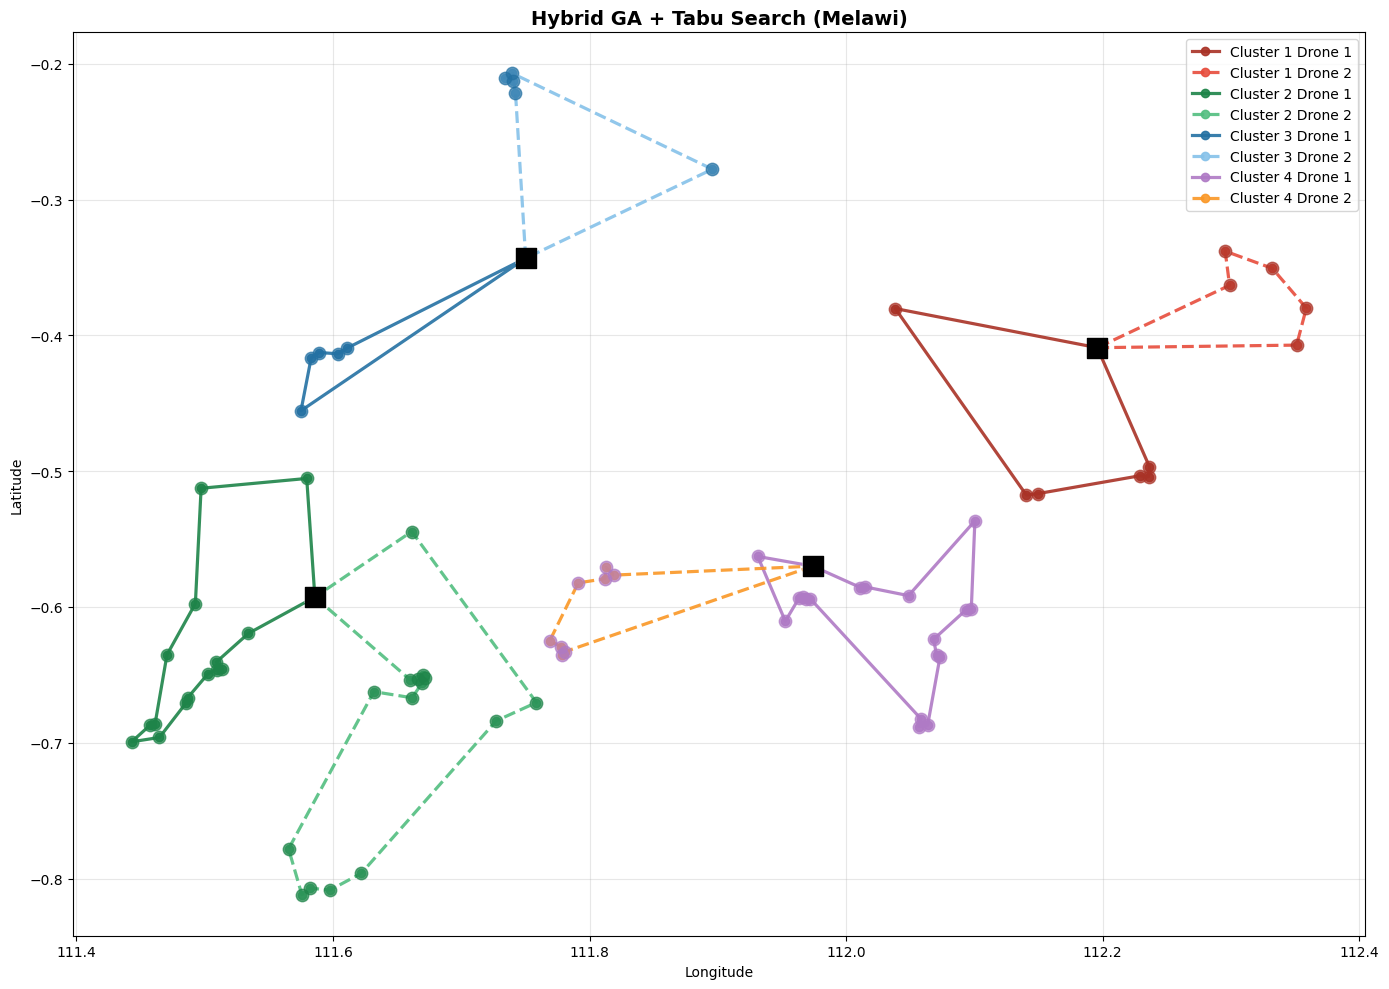

Total runtime: 31.64 seconds (0.53 minutes)


In [5]:
from new_ga_ts import *
import time
road_points = {
    0: (-0.409011175, 112.1958254),
    1: (-0.592699463, 111.5859392),
    2: (-0.343085986, 111.7502586),
    3: (-0.569912205, 111.9740824)
}
routing_best = ClusterBasedDroneRoutingHybridTabuMelawi(
    csv_file="hotspot_clustered.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2, 3: 2},
    tabu_tenure=14,
    tabu_budget=87
)

# --- Start timing here ---
start_time = time.time()

routes_best = routing_best.optimize_all_clusters(
    population_size=20,
    generations=129,
    mutation_rate=0.1854426108839352
)

# --- End timing ---
end_time = time.time()
runtime = end_time - start_time

routing_best.print_cluster_routes(routes_best)
routing_best.visualize_cluster_routes(routes_best)
print(f"Total runtime: {runtime:.2f} seconds ({runtime/60:.2f} minutes)")